<a href="https://colab.research.google.com/github/CharlieWavra/Python-Fundamentals/blob/main/SteamProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT STEAM 200K**
NAME: Karoly Wavra

#**INTRODUCTION:** 
##Steam 200k
Steam is the world's most popular PC Gaming hub, with over 6,000 games and a community of millions of gamers. With a massive collection that includes everything from AAA blockbusters to small indie titles, great discovery tools are a highly valuable asset for Steam. How can we make them better?

This dataset is a list of user behaviors, with columns: 
user-id, game-title, behavior-name, value. The behaviors included are 'purchase' and 'play'. 
The value indicates the degree to which the behavior was performed - in the case of 'purchase' the value is always 1, 
and in the case of 'play' the value represents the number of hours the user has played the game.

This dataset is generated entirely from public Steam data, so we want to thank Steam for building such an awesome platform and community!

**Source:**
I downloaded the excel file from https://www.kaggle.com/tamber/steam-video-games

#**TABLE OF CONTENT:**


1. Importing dataset
2. Cleaning and wrangling data
3. Interpreting data
4. Further investigation into data:
 * Game Titles played
 * Most played Game Titles
 * Game Titles purchased
 * Multi Purchases
 * Number of Purchases
 * Number of Downloads per Game Title
5. Top 10 Downloaded Game Titles in a chart
6. Top 10 Most Played Game Titles in a chart
7. Function

# **1. Importing dataset**

To do this I have to use Pandas

In [ ]:
import pandas as pd

url="https://github.com/CharlieWavra/Python-Fundamentals/blob/main/Dataset/steam-200k.xlsx?raw=true"
steam_df=pd.read_excel(url, header=None) #As my dataset didn't have column names I had to add header=none
steam_df

,0,1,2,3,4
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0


We found out that the dataset includes 200k rows (as per the title says as well)



#**2. Cleaning and wrangling data:**

**2.1 As we can see in the last column there is no useful data probably, but to make sure I can use .describe()**

In [ ]:
steam_df.describe()

,0,3,4
count,2.000000e+05,200000.000000,200000.0
mean,1.036559e+08,17.874384,0.0
std,7.208074e+07,138.056952,0.0
min,5.250000e+03,0.100000,0.0
25%,4.738420e+07,1.000000,0.0
50%,8.691201e+07,1.000000,0.0
75%,1.542309e+08,1.300000,0.0
max,3.099031e+08,11754.000000,0.0


**2.2 After finding out there is really no useful data in last column I can drop it from the dataset**

In [ ]:
steam_df=steam_df.drop(4,axis=1)
steam_df

,0,1,2,3
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
...,...,...,...,...
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,1.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,1.0


**2.3 At the moment my column names are numbers. Next step to give them an appropriate name, by changing column names.**

2.3.1 Existing column names by dataset:

In [ ]:
steam_df.columns #existing column names

Int64Index([0, 1, 2, 3], dtype='int64')

2.3.2 Adding names to columns:

In [ ]:
column_names=["User ID", "Game Title", "Behaviour", "Value"] #As mentioned before Value can be the time of Title played or the count of purchases per User ID

In [ ]:
steam_df.columns=column_names
steam_df

,User ID,Game Title,Behaviour,Value
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
...,...,...,...,...
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,1.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,1.0


#**3. Interpreting Data:**

**3.1 Users - Number of Users:**

In [ ]:
user_no=pd.value_counts(steam_df["User ID"]) #This will show me how many Users are in the list
print("The number of users in this list are",len(user_no))

The number of users in this list are 12393


**3.2 Game Titles:** 


To find out the Number of Game Titles I will have to remove duplicate rows from "Game Title" column and the rows that has the unique word "purchase":

In [ ]:
steam_df.drop_duplicates(subset=["Game Title","Value"]).describe()

,User ID,Value
count,5.090400e+04,50904.000000
mean,9.520662e+07,59.223387
std,6.633071e+07,264.803776
min,5.250000e+03,0.100000
25%,4.602897e+07,1.100000
50%,8.012823e+07,5.300000
75%,1.354002e+08,19.400000
max,3.096261e+08,11754.000000


**3.3 Number of Game Titles:**

In [ ]:
steam_titles=steam_df["Game Title"].unique()
print("The number of Game Titles in this list are",len(steam_titles))

The number of Game Titles in this list are 5155


Double checking if my investigation was correct:

In [ ]:
steam_title_df=steam_df.drop_duplicates(subset=["Game Title"])
steam_title_df.describe()

,User ID,Value
count,5.155000e+03,5155.0
mean,8.557690e+07,1.0
std,6.422450e+07,0.0
min,2.989500e+05,1.0
25%,4.330267e+07,1.0
50%,6.478796e+07,1.0
75%,1.185419e+08,1.0
max,3.086530e+08,1.0


#**4. Further investigation - Splitting to separate dataframes**

**4.1.0 Game Titles played - In this dataframe I will only see Game Titles played and played hours.**

In [ ]:
play_df=steam_df.loc[steam_df.Behaviour=="play"]
play_df

,User ID,Game Title,Behaviour,Value
1,151603712,The Elder Scrolls V Skyrim,play,273.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9
...,...,...,...,...
199991,128470551,Fallen Earth,play,2.4
199993,128470551,Magic Duels,play,2.2
199995,128470551,Titan Souls,play,1.5
199997,128470551,Grand Theft Auto Vice City,play,1.5


In [ ]:
play_df=steam_df.loc[steam_df.Behaviour=="play"] #With this line of code I can check the minimum, maximum, average time spent playing a Game Title
play_df.describe()

,User ID,Value
count,7.048900e+04,70489.000000
mean,1.058812e+08,48.878063
std,7.150365e+07,229.335236
min,5.250000e+03,0.100000
25%,4.934256e+07,1.000000
50%,9.169067e+07,4.500000
75%,1.556738e+08,19.100000
max,3.099031e+08,11754.000000


In [ ]:
len(play_df) #********

70489

4.1.1 Most played Game Title - I have to find out which game was played the most from my list, so I have to do the following:




In [ ]:
most_hours=steam_df["Value"].max(axis=0) #This will show me the total number of hours played with a game
most_hours

11754.0

4.1.2 Unfortunately I only found out the total hours but not the Game Title previously, now I will look into which one was that. I'm going to select the row with highest hours played and it will show me the rest of the information also

In [ ]:
play_df[steam_df["Value"]==11754.0] #This will show me which Game Title have been played 11754 hour in total by which User ID

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,User ID,Game Title,Behaviour,Value
123726,73017395,Sid Meier's Civilization V,play,11754.0


**4.2 In this dataframe I will only see Game Titles purchased**

In [ ]:
purchase_df=steam_df.loc[steam_df.Behaviour=="purchase"]
purchase_df

,User ID,Game Title,Behaviour,Value
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
2,151603712,Fallout 4,purchase,1.0
4,151603712,Spore,purchase,1.0
6,151603712,Fallout New Vegas,purchase,1.0
8,151603712,Left 4 Dead 2,purchase,1.0
...,...,...,...,...
199990,128470551,Fallen Earth,purchase,1.0
199992,128470551,Magic Duels,purchase,1.0
199994,128470551,Titan Souls,purchase,1.0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0


**4.3 Multiple Purchases - With this line of code I can check if any Game Titles been purchased more than 1 time by a single User ID:**

In [ ]:
purchase_df=steam_df.loc[steam_df.Behaviour=="purchase"] 
purchase_df.describe()

,User ID,Value
count,1.295110e+05,129511.0
mean,1.024447e+08,1.0
std,7.236442e+07,0.0
min,5.250000e+03,1.0
25%,4.550738e+07,1.0
50%,8.605570e+07,1.0
75%,1.542307e+08,1.0
max,3.099031e+08,1.0


**4.4 Number of purchases:**

In [ ]:
len(purchase_df)

129511

**4.5 Number of downloads per title**

In [ ]:
titles_per_down=pd.value_counts(steam_df["Game Title"]) #This is showing me the Titles and the times they've been downloaded (Lenght)
titles_per_down

Dota 2                             9682
Team Fortress 2                    4646
Counter-Strike Global Offensive    2789
Unturned                           2632
Left 4 Dead 2                      1752
                                   ... 
Putt-Putt Joins the Parade            1
Ducati World Championship             1
Chunk of Change Knight                1
STASIS                                1
Soccertron                            1
Name: Game Title, Length: 5155, dtype: int64

#**5. Presenting the TOP 10 downloaded Game Titles with a chart**

**5.1 Number of downloads per Game Title:**

To find out the first 10 most downloded titles I have to use .head(10)

In [ ]:
titles_per_down.head(10)

Dota 2                             9682
Team Fortress 2                    4646
Counter-Strike Global Offensive    2789
Unturned                           2632
Left 4 Dead 2                      1752
Counter-Strike Source              1693
Counter-Strike                     1424
Garry's Mod                        1397
The Elder Scrolls V Skyrim         1394
Warframe                           1271
Name: Game Title, dtype: int64

**5.2 Creating a Pie Chart using matplotlib:**

In [ ]:
import matplotlib.pyplot as plt

def create_pie_chart():

  plt.figure(figsize=(7,7))

  labels=["Dota 2","Team Fortress 2","Counter-Strike Global Offensive","Unturned","Left 4 Dead 2","Counter-Strike Source","Counter-Strike","Garry's Mod","The Elder Scrolls V Skyrim","Warframe"]
  values=[9682,4646,2789,2632,1752,1693,1424,1397,1394,1271]
  explode=[0.05,0,0,0,0,0,0,0,0,0]


  plt.pie(values,labels=labels,shadow=True,explode=explode,startangle=90,wedgeprops={"edgecolor":"white"}) # I could insert the percentages in the slices also (autopct="%1.1f%%"), but in this case I don't see it necessary.
  plt.title("Top 10 Steam Downloads")
  plt.show()
  return None

#create_pie_chart()

#**6. Presenting the TOP 10 most played Game Titles with a chart**

**6.1 Total hours played on unique games:**

In [ ]:
most_played_df=play_df.groupby("Game Title")["Value"].sum() #Here I sum up the hours played per Game Titles
most_played_df.sort_values(ascending=False).head(10) #By default Python sorting the values in ascending order so I have to specify and tell Python that ascending is false in this case and I'm only interested in the first 10 Game Titles

Game Title
Dota 2                                         981684.6
Counter-Strike Global Offensive                322771.6
Team Fortress 2                                173673.3
Counter-Strike                                 134261.1
Sid Meier's Civilization V                      99821.3
Counter-Strike Source                           96075.5
The Elder Scrolls V Skyrim                      70889.3
Garry's Mod                                     49725.3
Call of Duty Modern Warfare 2 - Multiplayer     42009.9
Left 4 Dead 2                                   33596.7
Name: Value, dtype: float64

**6.2 Creating a bar chart using matplotlib:**

In [ ]:
def create_bar_chart():

  fig=plt.figure(figsize=(10,5))

  titles=["Dota 2","Counter-Strike GO","Team Fortress 2","Counter-Strike","Sid Meier's Civilization V","Counter-Strike Source","The Elder Scrolls V Skyrim","Garry's Mod","COD MW - Multiplayer","Left 4 Dead 2"]
  hours=[981684,322771,173673,134261,99821,96075,70889,49725,42009,33596]

  bars=plt.barh(titles,hours,color=["red","orange","orange","orange","green","green","green","blue","blue","blue"])

  plt.ylabel("TITLES")
  plt.xlabel("HOURS")

  plt.gca().invert_yaxis()

  plt.grid(axis="x")

  current_xaxis = plt.gca().get_xticks()
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_xaxis])

  plt.title("TOP 10 MOST PLAYED GAME TITLES")
  plt.show()
  return None

#create_bar_chart()

#**7. Function; Creating a Menu:**

1. Number of Users
2. Number of Game Titles
3. Number of purchases
4. Most hours played Game Title by a single User
5. The TOP 10 Downloaded Game Titles
6. The 10 Most played Game Titles
7. Source of data
8. Quit program
Please enter an option: 7
https://www.kaggle.com/tamber/steam-video-games
Please enter an option: 2
The number of Game Titles in the list is:  5155
Please enter an option: 5


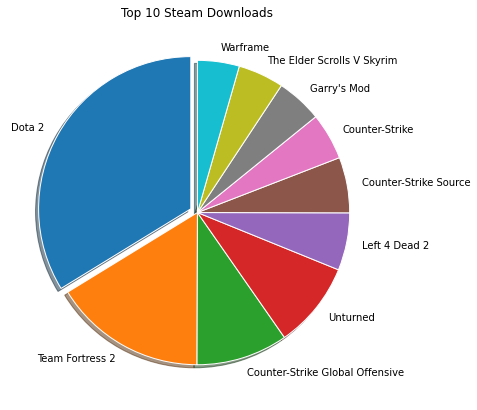

KeyboardInterrupt: ignored

In [ ]:
def Steam_menu():

  menu_option=0
  print("1. Number of Users")
  print("2. Number of Game Titles")
  print("3. Number of purchases") 
  print("4. Most hours played Game Title by a single User")
  print("5. The TOP 10 Downloaded Game Titles")    
  print("6. The 10 Most played Game Titles")
  print("7. Source of data")  
  print("8. Quit program")
  
  while menu_option!=8:
    menu_option=int(input("Please enter an option: "))
    if menu_option==1:
      print("The number of Users in this list is: ",(len(user_no)))

    elif menu_option==2:
      print("The number of Game Titles in the list is: ",(len(steam_titles)))

    elif menu_option==3:
      print("The number of purchases in this list is: ",(len(purchase_df)))

    elif menu_option==4:
      print("The most hours played on a single game by one user is: ",(most_hours))
      

    elif menu_option==5:
      create_pie_chart()

    elif menu_option==6:
      create_bar_chart()

    elif menu_option==7:
      print("https://www.kaggle.com/tamber/steam-video-games")

    elif menu_option==8:
      print("Goodbye")

    else:
      print("Invalid option, please try again")
Steam_menu()

**NOTE REGARDING EXERCISE 7.:** MY PIE CHART AND BAR CHART FUNCTIONS ARE WORKING PROPERLY BUT UNFORTUNATELY IN EXCERSISE 7 NOT GIVING ME THE DESIRED RESULT WHEN SELECTING OPTION 5 OR 6 (NO RETURNING QUESTION), BUT IT'S ONLY BECUASE THE FUNCTION IS IN COLABS.

#**REFLECTION:**

**Skills shown in this project:** 

Importing, cleaning, wrangling dataset. The use of Matplotlib, showing data with different type of charts. Creating user defined function.

**Difficulties:**

Exercise 7. My functions are working fine, but being in Google Colabs it's not showing the desired output.